In [1]:
import torch

### requires_grad=True

look at the code and try and figure out wha the result would be. if you got it- you may proceed.  
if not change the value of x and try again

In [2]:
x = torch.tensor(7., requires_grad=True)
y = x ** 2  # y = x^2
y.backward() #נגזרת
print(x.grad) #הצבה



tensor(14.)


In [3]:
x = torch.tensor(5., requires_grad=True)
y = x **3 + x
#y' = 3x^2 +1
y.backward()
print(x.grad)


tensor(76.)


### **Exercise: Animal Detection in Safari Images**

##### **Task Overview:**
You have a system designed to detect animals in images taken in the safari. You will work with image data, perform reshaping, calculate detection scores, and backpropagate through a loss function to update weights.

---
first - import the necessary libraries

In [4]:
import torch

##### **Steps:**

1. **Create the image tensor:**  
   The images are provided in the shape `(batch_size, height, width, channels)`.  
   - First- using torch .rand() Create a tensor of 4 images, each of size 32x32 with 3 color channels.
   - Then - rearrange the dimensions to match the format `(batch_size, channels, height, width).
   -  print the final shape to make sure it is mattching the standard 4,3,32x32

In [11]:
image = torch.rand(4,32,32,3)
#image = torch.rand(0,1,2,3)

image_reshaped = image.permute(0,3,1,2)
image_reshaped.shape

torch.Size([4, 3, 32, 32])

2. **Define weights:**  
   - Create a tensor of `weights` for each  of the 3  color channel. again use tensor.rand The tensor should have `requires_grad=True`.

In [12]:
weigths = torch.rand(3, requires_grad=True)

3. **Calculate detection scores:**  
   - Compute the sum of pixel values for each image and multiply by the weights.
   - hint: if you are having truble there is a hint at the end of this page:

In [16]:
image_reshaped.sum(dim =2).shape

torch.Size([4, 3, 32])

In [19]:
image_reshaped.sum(dim =(2,3))


tensor([[512.8609, 515.6026, 501.3276],
        [511.4517, 518.4221, 507.9557],
        [519.4543, 528.4644, 497.5841],
        [512.6465, 509.4131, 501.4521]])

In [17]:
(image_reshaped.sum(dim= (2,3))* weigths)

tensor([[153.5391,  72.4235, 446.0466],
        [153.1172,  72.8195, 451.9438],
        [155.5131,  74.2301, 442.7159],
        [153.4750,  71.5541, 446.1574]], grad_fn=<MulBackward0>)

In [20]:
(image_reshaped.sum(dim= (2,3))* weigths).shape

torch.Size([4, 3])

In [25]:
scores = (image_reshaped.sum(dim= (2,3))* weigths).sum(1)
scores

tensor([672.0092, 677.8806, 672.4590, 671.1864], grad_fn=<SumBackward1>)

4. **Define a loss function:**  
   - Create a loss function that calculates the mean squared error between the computed scores and a target value of `100`.

In [24]:
loss = ((scores -100)**2).mean()
loss

tensor(328775.9062, grad_fn=<MeanBackward0>)

5. **Perform backpropagation:**  
   - Use `backward()` to calculate the gradients of the weights based on the loss.

In [26]:
loss.backward()

6. **Display the gradients:**  
   - Print the gradients of the weights to see how they would be updated.

In [27]:
weigths.grad

tensor([589551.1250, 594004.7500, 575785.4375])

In [28]:
torch.set_printoptions(sci_mode = False)

In [36]:
x = torch.tensor(3. , requires_grad=True)
lr = 0.01


#לולאת אופטימיזציה
for i in range(500):
  f = x**2 +1
  #חישוב גרדיאנט
  f.backward()

  with torch.no_grad():
    x -= lr*x.grad

  if i%25 ==0 :
    print(f"\ti {i}, x ={x}, f= {f}")
  #איפוס גראדיאנט
  x.grad.zero_()

print(f"Minumum at x ={x}, f= {f}")

	i 0, x =2.99399995803833, f= 10.0
	i 25, x =2.847839117050171, f= 9.142725944519043
	i 50, x =2.708812713623047, f= 8.367105484008789
	i 75, x =2.576573371887207, f= 7.665364742279053
	i 100, x =2.4507896900177, f= 7.030467987060547
	i 125, x =2.331145763397217, f= 6.456042766571045
	i 150, x =2.2173430919647217, f= 5.936336517333984
	i 175, x =2.1090967655181885, f= 5.4661359786987305
	i 200, x =2.0061352252960205, f= 5.040724754333496
	i 225, x =1.908199429512024, f= 4.6558332443237305
	i 250, x =1.815044641494751, f= 4.30760383605957
	i 275, x =1.7264372110366821, f= 3.9925436973571777
	i 300, x =1.642155408859253, f= 3.707493543624878
	i 325, x =1.5619882345199585, f= 3.4495956897735596
	i 350, x =1.4857347011566162, f= 3.21626353263855
	i 375, x =1.4132039546966553, f= 3.005157947540283
	i 400, x =1.344213843345642, f= 2.814160108566284
	i 425, x =1.2785918712615967, f= 2.6413559913635254
	i 450, x =1.2161734104156494, f= 2.4850120544433594
	i 475, x =1.1568019390106201, f= 2.343

hint for 3:
- first add the number of pixels for each color in each picture like so: images_reshaped.sum(dim=(2, 3))
- multiply it by the weigths for each color
- now sum the result so there is a score for each image

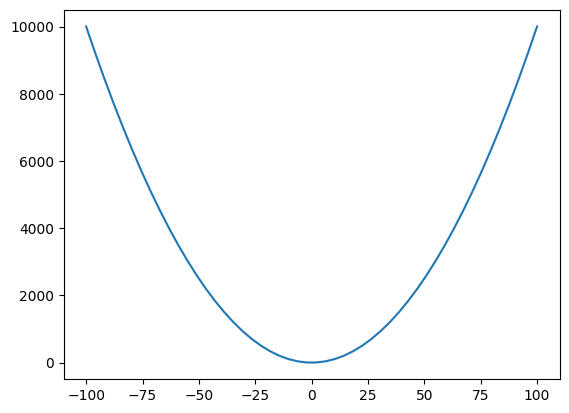

In [43]:
import matplotlib.pyplot as plt
import numpy as np


x =np.linspace(-100,100)

def f (x):
  return x**2+1

y = f(x)


plt.plot(x,y)
plt.savefig ('fig.jpeg')